In [1]:
include("../ConductionModel.jl");
using Plots, VegaLite, LaTeXStrings, QuadGK
import PyPlot

In [2]:
semiconductor = Semiconductor(
    1.38 * 10^-23,
    1.6*10^-19,
    10^7,
    0.1 * 1.6*10^-19,
    2.1 * 10^18,
    2.1 * 10^18,
    0.1 * 1.6 * 10^-19,
    -10^3,
    10^13,
    -10.0,
    2.7,
    2.7
);

range = -10:0.2:10
res = map(x -> electronMobility(semiconductor, RnnVRH, x, 300), range);

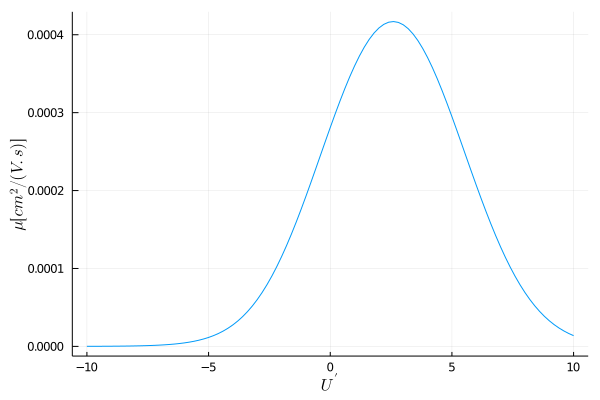

In [3]:
plot(range, res, xlabel=L"U^\prime", ylabel=L"\mu[cm^2/(V.s)]", label="")

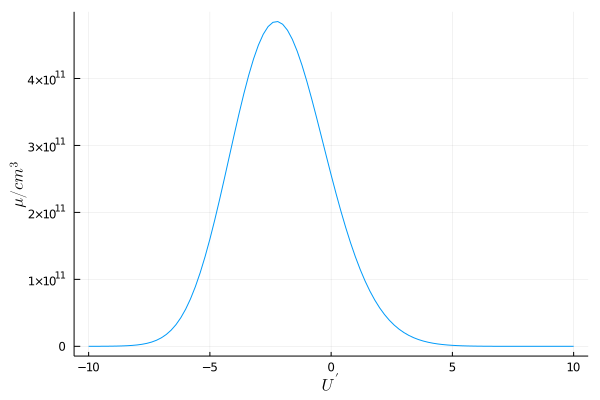

In [4]:
pondered = res .* map(x -> DOS(semiconductor, x, 300) * F(semiconductor, x, 300) * semiconductor.k * 300, range);
plot(range, pondered, xlabel=L"U^\prime", ylabel=L"\mu / cm^3", label="")

In [8]:
res = map(x -> electronMobility(semiconductor, RnnPercoField, x, 300), range);

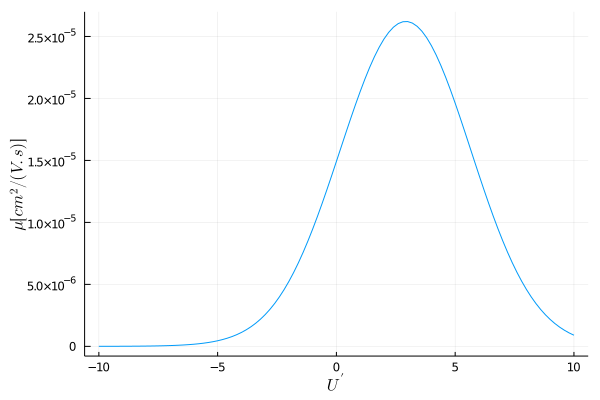

In [11]:
plot(range, res, xlabel=L"U^\prime", ylabel=L"\mu[cm^2/(V.s)]", label="")

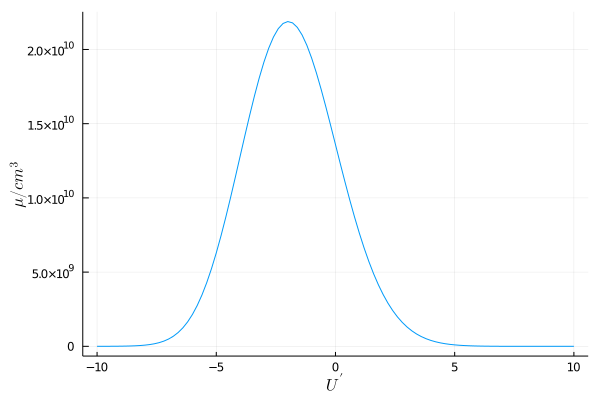

In [14]:
pondered = res .* map(x -> DOS(semiconductor, x, 300) * F(semiconductor, x, 300) * semiconductor.k * 300, range);
plot(range, pondered, xlabel=L"U^\prime", ylabel=L"\mu / cm^3", label="")

In [6]:
e = 1.6 * 10^-19

#quadgk(
#    r -> e * DOS(semiconductor, r, 300) * F(semiconductor, r, 300) * electronMobility(semiconductor, RnnVRH, r, 300) * semiconductor.k * 300,
#    -10,
#    10,
#    rtol=1e-5
#)

1.6000000000000018e-19